# Feature Engineering Part 1

### By Vipul Arora 
### March 21


---



---

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target


In [2]:
import pandas as pd

df=pd.DataFrame(X, columns= ['sepal_length','sepal_width','petal_length','petal_width'])

df['species']=y
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
# 1. Correlation matrix for the iris_df columns
# after excluding the target feature (species)

In [4]:
# droping the target feature (species) from the dataframe
iris_features = df.drop('species', axis=1)

# creating the correlation matrix
cor_matrix = iris_features.corr()

# printing the correlation matrix
print(cor_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


In [5]:
# 2. Creating a DataFrame called iris_df2 with the two
# feature least correlated.

In [6]:
# Since least correlated features are Sepal lenght and Sepal widht 
least_corr_features = iris_features.iloc[:, [0, 1]]

# printing the least correlated features

print(least_corr_features)

     sepal_length  sepal_width
0             5.1          3.5
1             4.9          3.0
2             4.7          3.2
3             4.6          3.1
4             5.0          3.6
..            ...          ...
145           6.7          3.0
146           6.3          2.5
147           6.5          3.0
148           6.2          3.4
149           5.9          3.0

[150 rows x 2 columns]


In [7]:
# adding and updating least_corr_features.
least_corr_features = ['sepal_width', 'sepal_length']

# creating the iris_df2 DataFrame with the two least correlated features
iris_df2 = df.loc[:,least_corr_features]

# print the iris_df2 DataFrame
print(iris_df2)


     sepal_width  sepal_length
0            3.5           5.1
1            3.0           4.9
2            3.2           4.7
3            3.1           4.6
4            3.6           5.0
..           ...           ...
145          3.0           6.7
146          2.5           6.3
147          3.0           6.5
148          3.4           6.2
149          3.0           5.9

[150 rows x 2 columns]


In [8]:
# 3. Scatter plot of the columns in iris_df2 

In [29]:
import altair as alt
from IPython.display import display 

# Join the iris_df2 with the original df on index
iris_joined = iris_df2.join(df['species'])


# Creating the the plot
alt.Chart(iris_joined).mark_circle(size=80).encode(
    x='sepal_length',
    y='sepal_width',
    color=alt.Color('species', scale=alt.Scale(scheme='viridis')),
    tooltip=['sepal_length', 'sepal_width', 'species']).interactive()
display(chart)

alt.Chart(...)

In [11]:
# 4. Using Sklearn to create a k-cluster (k=3 of course) model
# to classify the iris_df2 dataset. 

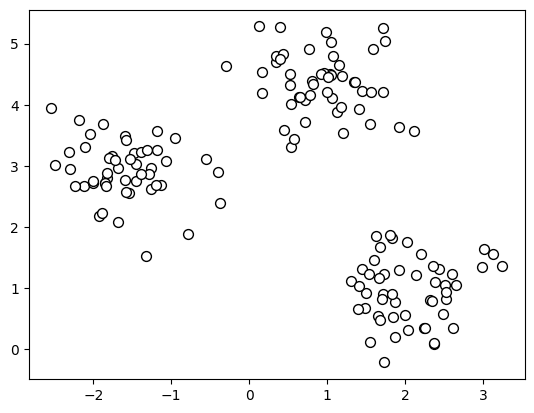

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# create dataset
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

In [13]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

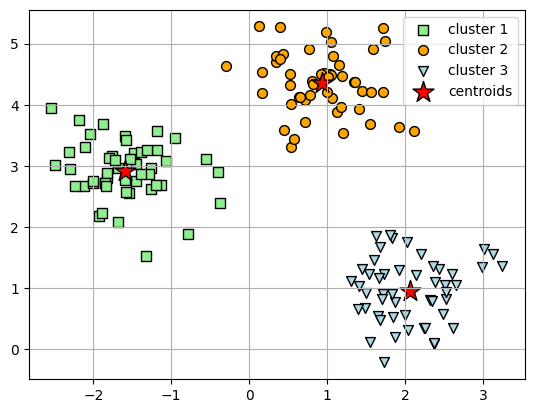

In [14]:
# plotting the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

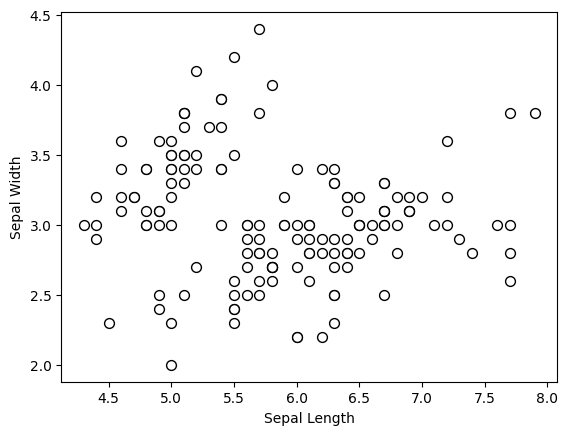

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


# plot
plt.scatter(
   iris_df2['sepal_length'], iris_df2['sepal_width'],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()



In [17]:
from sklearn.cluster import KMeans

x = iris_df2
# initializing KMeans model
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

# fit and predict
Y_km = km.fit_predict(x)

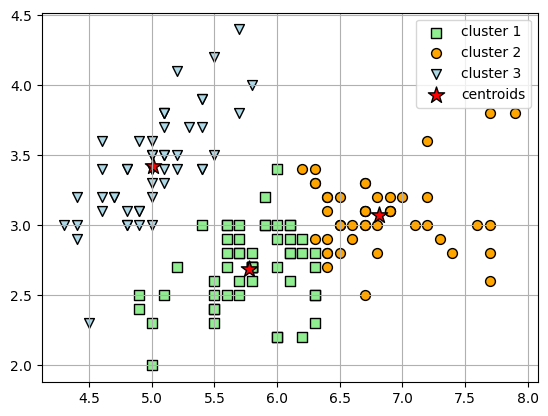

In [18]:
# plotting the 3 clusters
plt.scatter(
    x.loc[Y_km == 0, 'sepal_length'], x.loc[Y_km == 0, 'sepal_width'],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x.loc[Y_km == 1, 'sepal_length'], x.loc[Y_km == 1, 'sepal_width'],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    x.loc[Y_km == 2, 'sepal_length'], x.loc[Y_km == 2, 'sepal_width'],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plotting the centroids
plt.scatter(
    km.cluster_centers_[:, 1], km.cluster_centers_[:, 0],
    s=150, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
# 5. Testing your model accuracy on train/test subsets of sizes 80/20

In [19]:
#Testing the model accuracy on train/test subsets of sizes 80/20

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Splitting the data into train/test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a decision tree classifier on the training data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicting the species of iris flowers in the test set
y_pred = clf.predict(X_test)

# Calculating the accuracy of the classifier on the test set
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9666666666666667
